# ***Libraries***

In [21]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# ***Loading the Authors Dataset***

In [22]:
ppg_data = pd.read_csv('/media/work/icarovasconcelos/mono/data/authors-ppg7-6-processed.csv')
ppg_data.head()

,ano_calendario,ppg_codigo,ppg_nome,ppg_nota,institution_id,ies_sigla,nome_docente,doutorado_ano,regime_trabalho,carga_horaria,link_do_lattes,author_id,bolsista_produtividade,extrato_bolsa_produtividade,doutorado_institution_id,doutorado_institution_name,doutorado_ppg_codigo,doutorado_supervisor_id,doutorado_supervisor_name
0,2022,42005019016P8,CC,7,I45643870,PUC/RS,TIAGO COELHO FERRETO,2010,Integral,40,http://lattes.cnpq.br/8685431534934812,A5009859711,VERDADEIRO,DT2,I45643870,Pontifícia Universidade Católica do Rio Grande...,31005012004P9,A5071130875,César Augusto Fonticielha De Rose
1,2022,42005019016P8,CC,7,I45643870,PUC/RS,SORAIA RAUPP MUSSE,2000,Integral,40,http://lattes.cnpq.br/2302314954133011,A5059434669,VERDADEIRO,PQ1C,I5124864,École polytechnique fédérale de Lausanne,NaN,A5005709068,Dr Daniel Thalmann
2,2022,42005019016P8,CC,7,I45643870,PUC/RS,SABRINA DOS SANTOS MARCZAK,2011,Integral,40,http://lattes.cnpq.br/9458496222461501,A5014651524,VERDADEIRO,PQ2,I212119943,University of Victoria,NaN,A5007049054,Daniela Damian
3,2022,42005019016P8,CC,7,I45643870,PUC/RS,RODRIGO COELHO BARROS,2013,Integral,20,http://lattes.cnpq.br/8172124241767828,A5039629929,VERDADEIRO,PQ2,I17974374,Universidade de São Paulo,33002045004P1,A5079499583,André Carlos Ponce de Leon Ferreira de Carvalho
4,2022,42005019016P8,CC,7,I45643870,PUC/RS,RAFAEL PRIKLADNICKI,2009,Integral,40,http://lattes.cnpq.br/2007065934836962,A5024645888,VERDADEIRO,PQ1D,I45643870,Pontifícia Universidade Católica do Rio Grande...,31005012004P9,A5022404709,Jorge Luis Nicolas Audy


# ***Building the Collaborations Network***

In [23]:
import json

# Specify the path to your JSON file
json_file_path = '/media/work/icarovasconcelos/mono/data/7&6ppg_works_and_authors_since_2004.json'

# Load the JSON file
with open(json_file_path, 'r') as f:
    data = json.load(f)

- This Python script uses the NetworkX library to create a graph representation of a dataset. The dataset, `ppg_data`, containing information about authors and their works. The script is creating a graph where each node represents an author and each edge represents a collaboration between two authors.

- The script begins by converting the `ppg_data` DataFrame to a list of dictionaries, where each dictionary represents a row in the DataFrame. Each dictionary contains the data for a single author.

- Next, an empty graph `G` is created using the `nx.Graph()` function. The script then iterates over the list of dictionaries, adding a node to the graph for each author. The `add_node` function is used to add a node to the graph, and the author's ID is used as the node identifier. The author's name is added as a label to the node, and the rest of the author's data is added as additional attributes of the node.

- The script then iterates over a dictionary `data`, where each key-value pair represents a work and its authors. For each work, it generates all possible pairs of authors using the `combinations` function from the `itertools` module. If both authors in a pair have an 'author_id' and both authors exist as nodes in the graph, the script checks if an edge already exists between the two authors. If it does, the weight of the edge is incremented by 1. If it doesn't, a new edge is added with a weight of 1. The weight of an edge is used to represent the number of collaborations between two authors.

- The script then prints the number of nodes and edges in the graph, which represent the number of authors and collaborations, respectively.

- Next, the script calculates the total weight of all edges in the graph, which represents the total number of collaborations. It does this by iterating over all edges in the graph and summing their weights.

- Finally, the script finds and prints the edge with the highest weight, which represents the pair of authors with the most collaborations. It does this by iterating over all edges in the graph and finding the one with the highest weight.

In [24]:
from itertools import combinations

dicts = ppg_data.to_dict(orient='records')

G = nx.Graph()

for d in dicts:
    G.add_node(d['author_id'], label=d['nome_docente'], **d)

# Connect authors by work
for work_id, authors in data.items():
    for author1, author2 in combinations(authors, 2):
        if 'author_id' in author1 and 'author_id' in author2:
            if G.has_node(author1['author_id']) and G.has_node(author2['author_id']):
                if G.has_edge(author1['author_id'], author2['author_id']):
                    # If the edge already exists, increment its weight by 1
                    G[author1['author_id']][author2['author_id']]['weight'] += 1
                else:
                    # If the edge does not exist, add it with a weight of 1
                    G.add_edge(author1['author_id'], author2['author_id'], weight=1)

print("Number of nodes:", G.number_of_nodes())

# Print the number of edges
print("Number of edges:", G.number_of_edges())

total_weight = 0

total_weight = sum(data['weight'] for _, _, data in G.edges(data=True))

print("Number of colabs:", total_weight)

highest_weight = 0

highest_weight = max(G.edges(data=True), key=lambda edge: edge[2]['weight'])

print("Most colabs:",highest_weight)   

Number of nodes: 490
Number of edges: 2429
Number of colabs: 13557
Most colabs: ('A5026724035', 'A5014967408', {'weight': 115})


## *Visualising the Network*

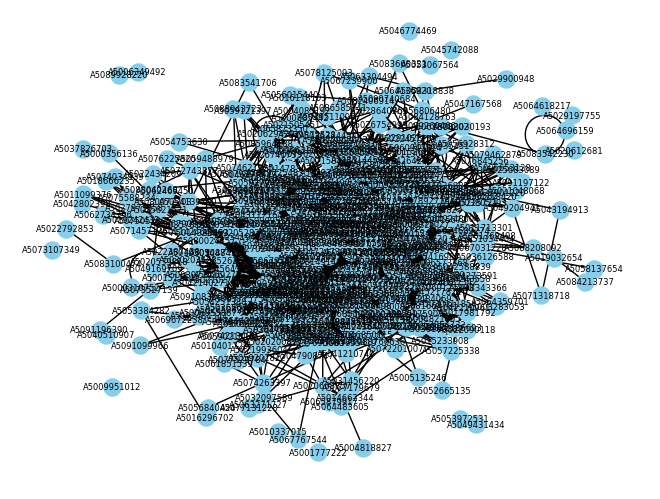

In [25]:
# Draw the graph using the calculated positions
nx.draw(G, with_labels=True, node_color='skyblue', node_size=150, edge_cmap=plt.cm.Blues, pos=nx.spring_layout(G, k=0.35), font_size=6)

# Show the plot
plt.show()

In [26]:
nx.write_graphml(G, "/media/work/icarovasconcelos/mono/ppg_graph.graphml")